<a href="https://colab.research.google.com/github/nahum0804/pokemonEvolutionDetector/blob/main/PokemonEvolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! kaggle datasets download -d kvpratama/pokemon-images-dataset

Dataset URL: https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset
License(s): CC0-1.0
 80% 57.0M/70.9M [00:01<00:00, 63.9MB/s]
100% 70.9M/70.9M [00:01<00:00, 66.3MB/s]


In [ ]:
! unzip pokemon-images-dataset.zip

Archive:  pokemon-images-dataset.zip
  inflating: pokemon/pokemon/1.png   
  inflating: pokemon/pokemon/10.png  
  inflating: pokemon/pokemon/100.png  
  inflating: pokemon/pokemon/101.png  
  inflating: pokemon/pokemon/102.png  
  inflating: pokemon/pokemon/103.png  
  inflating: pokemon/pokemon/104.png  
  inflating: pokemon/pokemon/105.png  
  inflating: pokemon/pokemon/106.png  
  inflating: pokemon/pokemon/107.png  
  inflating: pokemon/pokemon/108.png  
  inflating: pokemon/pokemon/109.png  
  inflating: pokemon/pokemon/11.png  
  inflating: pokemon/pokemon/110.png  
  inflating: pokemon/pokemon/111.png  
  inflating: pokemon/pokemon/112.png  
  inflating: pokemon/pokemon/113.png  
  inflating: pokemon/pokemon/114.png  
  inflating: pokemon/pokemon/115-mega.png  
  inflating: pokemon/pokemon/115.png  
  inflating: pokemon/pokemon/116.png  
  inflating: pokemon/pokemon/117.png  
  inflating: pokemon/pokemon/118.png  
  inflating: pokemon/pokemon/119.png  
  inflating: pokemon/poke

# **Dataset de Caracteristicas**

In [ ]:
import tensorflow as tf

In [ ]:
base_model = tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

171446536/171446536 [==============================] - 3s 0us/step


In [ ]:
base_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 42658176 (162.73 MB)
Trainable params: 42552832 (162.33 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


In [ ]:
import cv2
import glob
import numpy as np

In [ ]:
def getConvFeatures(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  img = np.expand_dims(img, axis=0)
  features = model.predict(img)
  return features.squeeze()

In [ ]:
getConvFeatures("/content/pokemon_jpg/pokemon_jpg/1.jpg")

1/1 [==============================] - 3s 3s/step


array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       1.2661293], dtype=float32)

In [ ]:
names = []
features = []

In [ ]:
for path in glob.glob("/content/pokemon_jpg/pokemon_jpg/*.jpg"):
  features.append(getConvFeatures(path).reshape(-1))
  names.append(path)

1/1 [==============================] - 0s 301ms/step


In [ ]:
len(features)

819

In [ ]:
features = np.array(features)
names = np.array(names)

# **Calculando la imagen más cercana**

In [ ]:
input_vector = getConvFeatures("/content/pokemon_jpg/pokemon_jpg/4.jpg")

1/1 [==============================] - 0s 362ms/step


In [ ]:
input_vector.shape

(100352,)

In [ ]:
from scipy import spatial

In [ ]:
dist = np.array([spatial.distance.cosine(input_vector, feature) for feature in features])

In [ ]:
dist

array([0.7426827 , 0.73477662, 0.76447853, 0.77996002, 0.76347424,
       0.77672908, 0.76234138, 0.75331543, 0.76799953, 0.77242571,
       0.72324127, 0.74159324, 0.81496319, 0.75082262, 0.7810761 ,
       0.74736974, 0.75151117, 0.74536505, 0.71162701, 0.71843153,
       0.76168293, 0.81410694, 0.78579049, 0.79081152, 0.78441896,
       0.77306353, 0.75761604, 0.78965388, 0.79662891, 0.76380198,
       0.75373495, 0.70688984, 0.74788353, 0.81322213, 0.66605568,
       0.77041076, 0.76440652, 0.72582474, 0.81177604, 0.75472254,
       0.7168704 , 0.73966688, 0.81572892, 0.75390019, 0.8115578 ,
       0.70680854, 0.77813762, 0.78038655, 0.72415146, 0.77934015,
       0.85056718, 0.76242451, 0.76438691, 0.76981343, 0.80705856,
       0.76076899, 0.75614111, 0.747127  , 0.77821167, 0.74161965,
       0.75599611, 0.78463425, 0.73427054, 0.72161809, 0.78345756,
       0.76196644, 0.71652159, 0.71908855, 0.81110916, 0.73796606,
       0.78827614, 0.77048697, 0.76876488, 0.75630671, 0.72855

In [ ]:
names[np.argmin(dist)] #Es la imagen más similar (O sea ella misma)

'/content/pokemon_jpg/pokemon_jpg/4.jpg'

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
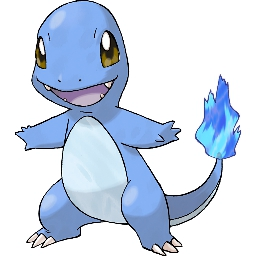

In [ ]:
cv2.imread(names[np.argmin(dist)]) #Ocupamos la segunda más cercana

In [ ]:
min_index = dist.argsort()[:5] #Se ordenan de menor a mayor y se obtienen los primeros 3

In [ ]:
min_index

array([524, 351, 369, 638, 325])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
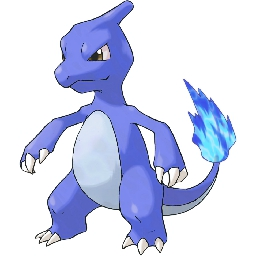

In [ ]:
cv2.imread(names[min_index[1]])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
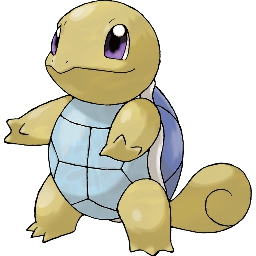

In [ ]:
cv2.imread(names[min_index[2]])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
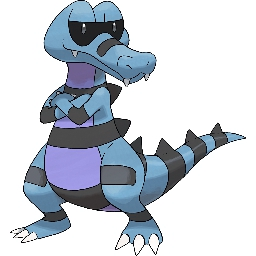

In [ ]:
cv2.imread(names[min_index[3]])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
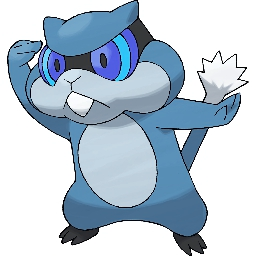

In [ ]:
cv2.imread(names[min_index[4]])